In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/Colab_Notebooks/EURUSD_2000_2025.csv"


In [8]:
import pandas as pd

# Read the CSV, skipping the first two metadata rows. We specify header=None
# as the column headers are not being correctly picked up.
df = pd.read_csv(file_path, skiprows=2, header=None)

# Assign correct column names based on the file's structure
df.columns = ['Price', 'Close', 'High', 'Low', 'Open', 'Volume']

# Drop the first row which contains the column names as data values
df = df.iloc[1:].copy()

# Rename the 'Price' column to 'Date' for clarity
df = df.rename(columns={'Price': 'Date'})

# Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Convert relevant columns to numeric, coercing errors will turn non-numeric into NaN
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')

# Drop any rows where 'Close' (or other critical columns) became NaN due to coercion
df = df.dropna(subset=['Close'])

df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0.0
2003-12-02,1.208897,1.210903,1.194600,1.196101,0.0
2003-12-03,1.212298,1.213003,1.207700,1.209000,0.0
2003-12-04,1.208094,1.214403,1.204398,1.212004,0.0
2003-12-05,1.218695,1.219096,1.206593,1.207802,0.0


In [4]:
df.tail(10)


,Price,Close,High,Low,Open,Volume
5465,2024-12-18,1.0495051145553589,1.0515247583389282,1.0467805862426758,1.0495051145553589,0
5466,2024-12-19,1.0350252389907837,1.0422203540802002,1.0352503061294556,1.0350252389907837,0
5467,2024-12-20,1.0364949703216553,1.0433076620101929,1.0344257354736328,1.0364949703216553,0
5468,2024-12-23,1.0433076620101929,1.0448229312896729,1.038594126701355,1.0433076620101929,0
5469,2024-12-24,1.0405826568603516,1.0411244630813599,1.0387451648712158,1.0405826568603516,0
5470,2024-12-25,1.0402579307556152,1.0432968139648438,1.0401498079299927,1.0402579307556152,0
5471,2024-12-26,1.0399551391601562,1.042535424232483,1.0391446352005005,1.0399551391601562,0
5472,2024-12-27,1.0423181056976318,1.0444954633712769,1.0406694412231445,1.0423181056976318,0
5473,2024-12-30,1.0429377555847168,1.0458500385284424,1.0374196767807007,1.0429377555847168,0
5474,2024-12-31,1.040615200996399,1.0424268245697021,1.0348539352416992,1.040615200996399,0


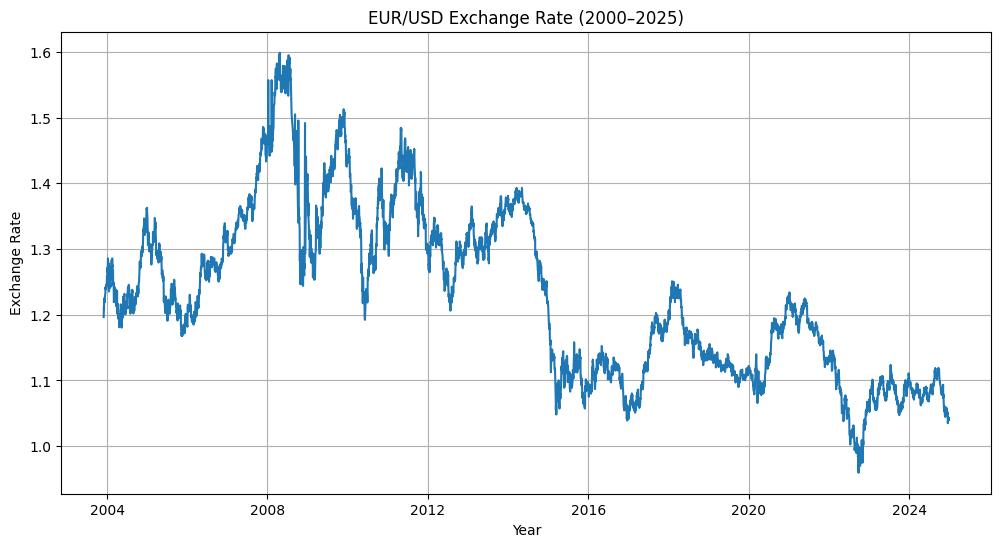

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'])
plt.title("EUR/USD Exchange Rate (2000–2025)")
plt.xlabel("Year")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.show()
